# <div align="center">Spectrogram</div>
---------------------------------------------------------------------

The spectrum is a complete, alternative representation of a signal; by analyzing the spectrum, one can obtain, at a glance, the fundamental information, reguired to characterize and classify a signal in the frequency domain.

### The magnitude 
of a signal’s spectrum, obtained by the Fourier
transform, represents the ***energy distribution in frequency*** for the signal.

### Phase
As we know, Fourier representation allows us to
think of any signal as the sum of the outputs of a (potentially infinite) number of sinusoidal generators. While the magnitude of the spectrum defines
the inherent power produced by each of the generators, its phase defines the
relative alignment of the generated sinusoids. This alignment determines
the shape of the signal in the discrete-time domain.

The simplest time-frequency transformation is called the ***spectrogram***. The
recipe involves splitting the signal into small consecutive (and possibly overlapping) length-N pieces and computing the DFT of each. What we obtain
is the following function of discrete-time and of a dicrete frequency index:

<img src='_assets/1.png'>

where M, 1 ≤ M ≤ N controls the overlap between segments. In matrix
notation we have

<img src='_assets/2.png'>

The resulting spectrogram is therefore an $N \times \lfloor L/M \rfloor$ matrix, where L is the
total length of the signal x[n]. It is usually represented graphically as a plot
in which the x-axis is the discrete-time index m, the y -axis is the discrete
frequency index k and a color is the magnitude of $S[k,m]$, with darker colors
for larger values.

Each of the columns of ***S*** represents the "local" spectrum of the signal for
a time interval of length N. We can therefore say that the time resolution
of the spectrogram is N samples since the value of the signal at time $n_{0}$ influences the DFT of the N-point window around $n_{0}$. Seen from another
point of view, the time information is ***smeared*** over an N-point interval.
At the same time, the frequency resolution of the spectrogram is $2 \pi /N$ (and
we can not increase it by zero-padding, as we have just shown). The conflict is therefore apparent: if we want to increase the frequency resolution
we need to take longer windows but in so doing, we lose the time localization of the spectrogram; likewise, if we want to achieve a fine resolution in
time, the corresponding spectral information for each “time slice” will be
very coarse. It is rather easy to show that the amount of overlap does not
change the situation. In practice, we need to choose an optimal tradeoff
taking the characteristics of the signal into consideration.

The above problem, described for the case of the spectrogram, is actually a particular instance of a general uncertainty principle for time-frequency analysis. The principle states that, independently of the analysis
tools that we put in place, we can never hope to achieve arbitrarily good resolution in both time and frequency since there exists a lower bound greater
than zero for the product of the localization measure in time and frequency.

The conceptual representation of discrete-time signals relies on the notion
of a dimensionless “time”, indicated by the integer index n. The absence of
a physical dimension for time has the happy consequence that all discrete time signal processing tools become indifferent to the underlying physical
nature of the actual signals: stock exchange values or sampled orchestral
music are just sequences of numbers. Similarly, we have just derived a frequency representation for signals which is based on the notion of a dimensionless frequency; 

***because of the periodicity of the Fourier basis, all we
know is that $\pi$ is the highest digital frequency that we can represent in this
model***. Again, the power of generality is (or will soon be) apparent: a digital
filter which is designed to remove the upper half of a signal’s spectrum can
be used with any type of input sequence, with the same results. This is in
stark contrast with the practice of analog signal processing in which a halfband filter (made of capacitors, resistors and other electronic components)
must be redesigned for any new class of input signals.

This dimensionless abstraction, however, is not without its drawbacks
from the point of view of hands-on intuition; after all, we are all very familiar with signals in the real world for which time is expressed in seconds
and frequency is expressed in hertz. We say, for instance, that speech has a
bandwidth up to 4 KHz, that the human ear is sensitive to frequencies up to
20 KHz, that a cell phone transmits in the GHz band, and so on. What does
$\pi$ mean in these cases? The precise, formal link between real-world signal and discrete-time signal processing is given by the Sampling Theorem,
which we will study later. The fundamental idea, however, is that we can
remove the abstract nature of a discrete-time signal (and, correspondingly,
of a dimensionless frequency) by ***associating a time duration to the interval
between successive discrete-time indices in the sequence.***

Let us say that the ***real-world*** time between indices n and n + 1 in a
discrete-time sequence is $T_{s}$ seconds (where $T_{s}$ is generally very small); this
can correspond to sampling a signal every $T_{s}$ seconds or to generating a synthetic sequence with a DSP chip whose clock cycle is $T_{s}$ seconds. Now, recall
that the phase increment between successive samples of a generic complex
exponential $e^{j \omega _{0}n}$ is $\omega _{0}$ radians. The oscillation, therefore, completes a full
cycle in $n_{0} = (2 \pi /\omega _{0})$ samples. If $T_{s}$ is the real-world time between samples,
the full cycle is completed in $n_{0} T_{s}$ seconds and so its “real-world” frequency
is $f_{0} = 1/(n_{0} T_{s})$ hertz. The relationship between the digital frequency $\omega _{0}$
and the “real” frequency $f_{0}$ in Hertz as determined by the “clock” period $T_{s}$
is therefore

<img src='_assets/3.png'>

In particular, the highest real frequency which can be represented in the
discrete-time system (which corresponds to $\omega = \pi$) is

<img src='_assets/4.png'>

where we have used $F_{s} = (1/T_{s} )$; $F_{s}$ is just the operating frequency of the discrete time system (also called the sampling frequency or clock frequency).
With this notation, the digital frequency $\omega _{0}$ corresponding to a real frequency $f_{0}$ is

<img src='_assets/5.png'>

The compact disk system, for instance, operates at a frequency $F_{s}$ = 44.1 KHz; the maximum representable frequency for the system is 22.05 KHz
(which constitutes the highest-pitched sound which can be encoded on,
and reproduced by, a CD).

In [1]:
import numpy as np

import scipy.io.wavfile as wavfile
import scipy.io
from scipy import signal

import time
import os

import ffmpeg

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

import glob

## Initialization
import IPython.display as ipd
import IPython
# import librosa.displaynum_channels
%matplotlib inline

In [2]:
input_path = '_inputs/'
output_path = '_outputs/'

In [3]:
def convert_signal(path):
    """
    Convert all m4a signal to wav signal in path directory
    -------------
    Parameters:
        path (string): relative path of folder where m4a iles are located
    Returns:
        None - Function will add new wav file to path directory
    -------------
    """

    for filename in os.listdir(path):
        if (filename.endswith(".m4a")) or (filename.endswith(".mp4")):
            os.system("ffmpeg -i {0} -ar 16000 {1}.wav".format(path + filename, path + filename[:-4]))
        else:
            continue

In [4]:
def read_audio(path, file_name):
    """
    Read files from specified path (relative or absolute)
    -------------
    Parameters:
        path (string): relative path to read file
        file_name (string): name of file located in path we want to read
    Returns:
        tuple: rate and date of wav file
    -------------
    """
    rate, data = wavfile.read(str(path) + str(file_name))
    data = data.astype('int16')
    return rate, data

In [5]:
def write_audio(path, sr, data):
    """
    Write audio file to path
    -------------
    Parameters:
        path (string): relative path to write file
        sr (int): sampling rate
        data (array_like): actual signal to write
    Returns:
        None
    -------------
    """
    data = data.astype('int16')
    wavfile.write(path, sr, data)
    return None

In [7]:
def get_spcgr(audio_path, png_path, cmapval, start=0, duration=5):
    """
    Extracts audio data, get spectrogram of signal and save it to mentioned (png_path) directory
    -------------
    Parameters:
        audio_path (string): relative path from which we will read the signal
        png_path (string): path where to save obtained spectrogram's picture
        cmapval: color theme
        duration (int): duration of signal in seconds
    Returns:
        None
    """
    fs, mix_data = wavfile.read(audio_path)
    audio_dir = os.path.dirname(audio_path)
    audio_name = os.path.basename(audio_path).split('.') [0]
    
    frlen = int(short_time * fs / 1000) # frame length with duration short_time ms 
    ovlap = int(frlen / 2) # overlap of adjacent frames
    
    f, t, Sxx = signal.spectrogram(mix_data[start*fs:(start+duration)*fs], fs=fs, window='hamming', nperseg=frlen, noverlap=ovlap)
    fig = plt.figure()
    fig.canvas.set_window_title(audio_name)
    plt.pcolormesh(t, f, Sxx, cmap=cmapval, norm=colors.PowerNorm(gamma=1./3.), edgecolors='None', shading='gouraud') # cmap = 'inferno', 'bwr', 'binary', 'Greys', 'OrRd', 'jet', 'Blues', 'afmhot', 'RdYlBu', 'PuBu', 'PuBu_r'
#     plt.pcolormesh(t, f, Sxx, cmap=cmapval, norm=colors.LogNorm(), edgecolors='None', shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    fig.set_size_inches(size_pixel_y / dpi_value, size_pixel_x / dpi_value)
    fig.savefig(os.path.join(png_path, audio_name + '.png'), dpi = dpi_value)
    plt.show()
    
    return None

In [8]:
# Convert all test voices to wav
convert_signal(input_path)

In [41]:
short_time = 100 #miliseconds
start_t = 0 # start time in seconds
color_theme = 'hot' # inferno, gnuplot2, jet, jet_r, Greys_r, terrain, plasma, gist_gray, gist_gray_r, spectral, bone_r, hot
dpi_value = 96 # dots per inch
size_pixel_y = 1301 
size_pixel_x = 710

#### DTMF signal of my number
$$
    x[n] = \sin(2\pi\,(f_l/F_s)\, n) + \sin(2\pi\,(f_h/F_s)\,n)
$$

In [29]:
armine_numbers = [(941, 1336), (852, 1477), (697, 1209), (697, 1336), (770, 1209), (697, 1477), (697, 1336), (770, 1209), (697, 1209)]

In [30]:
levon_numbers = [(941, 1336), (852, 1477), (852, 1336), (697, 1336), (941, 1336), (770, 1336), (697, 1336), (941, 1336), (941, 1336)]

In [31]:
silent = 0.5
FS = 24000

In [32]:
def generate_samples(numbers):
    n = np.arange(0, int(0.5 * FS))
    x = np.array([])
    samples = np.array([])
    for num in numbers:
        F_L, F_H = num
        samples = np.sin(2*np.pi *(F_L / FS)* n) + np.sin(2*np.pi * (F_H / FS) * n)
        samples_with_silent = np.append(samples, np.zeros(int(silent * FS)))
        x = np.append(x, samples_with_silent)
    return x

#### Armine's number

In [33]:
armine_samples = generate_samples(armine_numbers)
IPython.display.Audio(armine_samples, rate=FS)

In [34]:
levon_samples = generate_samples(levon_numbers)
IPython.display.Audio(levon_samples, rate=FS)

In [35]:
write_audio('_inputs/armine_numbers.wav', FS, armine_samples)
write_audio('_inputs/levon_numbers.wav', FS, levon_samples)

In [36]:
armine_file_name = 'armine_numbers.wav'
levon_file_name = 'levon_numbers.wav'

In [37]:
sampling_rate, data_armine = read_audio(input_path, armine_file_name)
ipd.Audio(data_armine, rate=sampling_rate)

In [38]:
sampling_rate, data_levon = read_audio(input_path, levon_file_name)
ipd.Audio(data_levon, rate=sampling_rate)

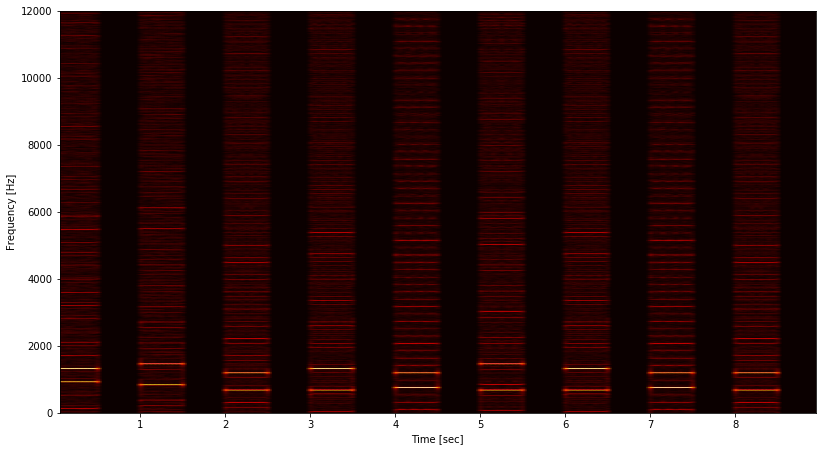

In [42]:
get_spcgr(input_path + armine_file_name, output_path,  color_theme, start_t, 9)

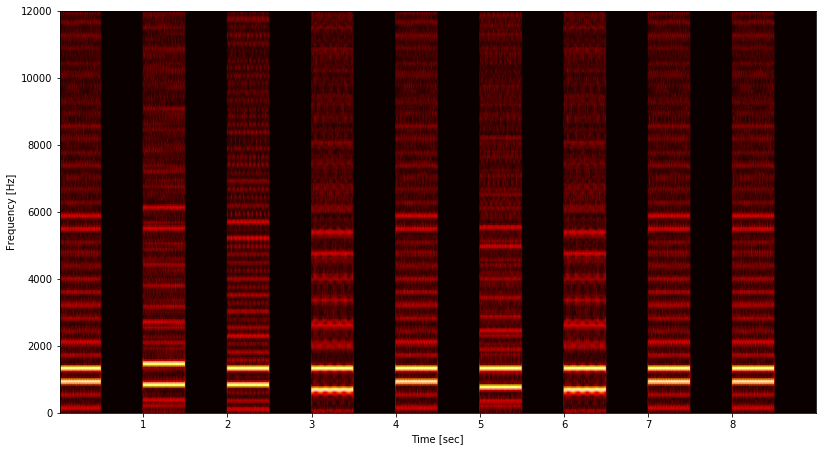

In [40]:
get_spcgr(input_path + levon_file_name, output_path,  color_theme, start_t, 9)

In [22]:
file_name = 'Levon_Voice.wav'

In [23]:
sampling_rate, data = read_audio(input_path, file_name)
ipd.Audio(data, rate=sampling_rate)

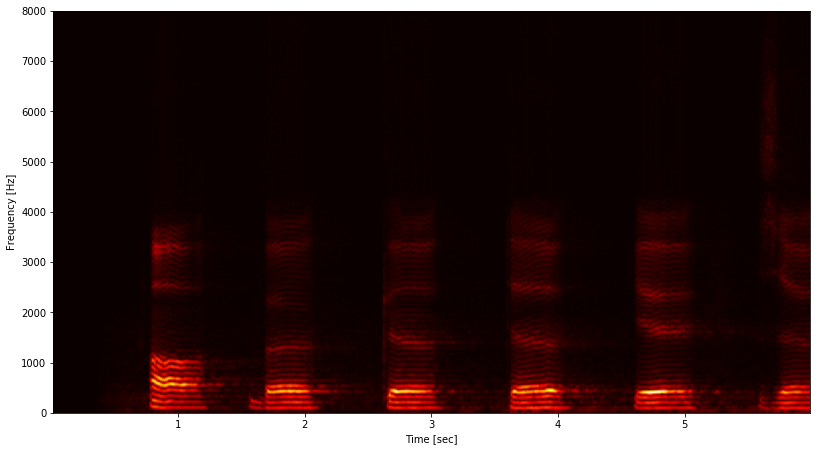

In [24]:
get_spcgr(input_path + file_name, output_path,  color_theme, start_t, 6)

In [25]:
file_name = 'Armine_Voice.wav'

In [26]:
sampling_rate, data = read_audio(input_path, file_name)
ipd.Audio(data, rate=sampling_rate)

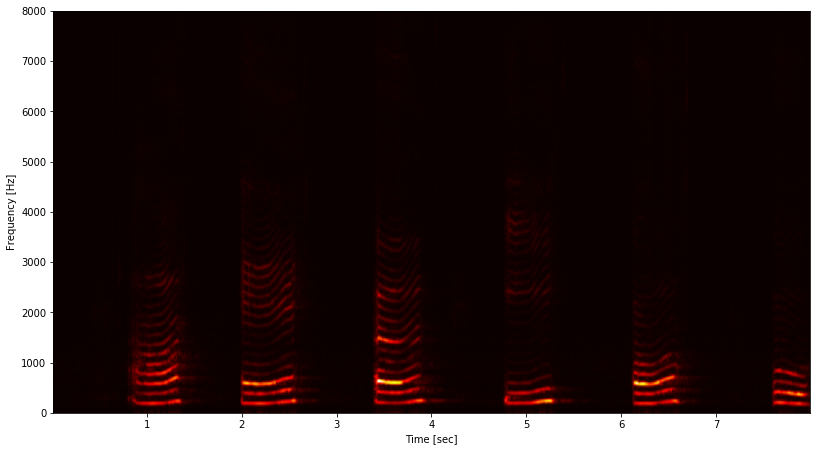

In [27]:
get_spcgr(input_path + file_name, output_path,  color_theme, start_t, 8)